<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [4]:
# loading the data: Wholesale customers data
df = pd.read_csv('../data/Wholesale customers data.csv')
# Display the first few rows of the dataset
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

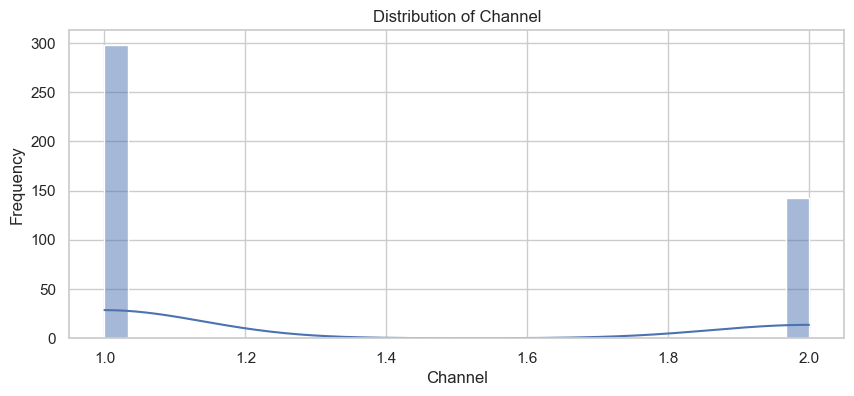

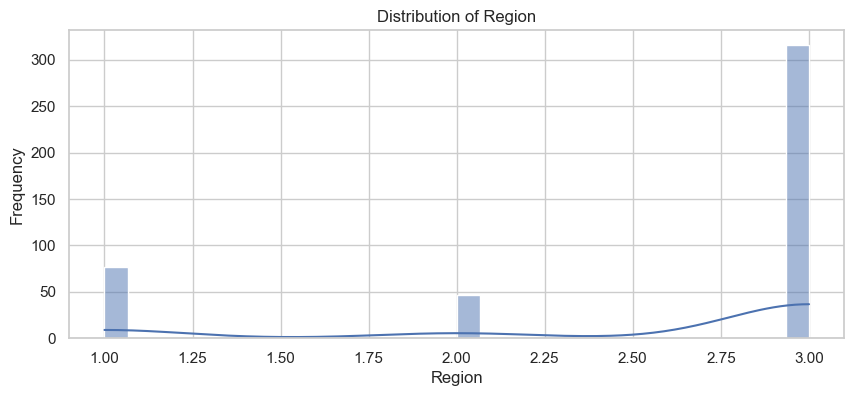

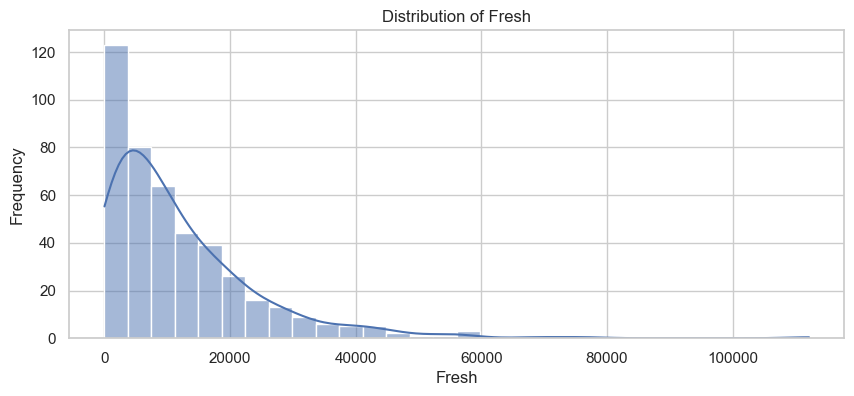

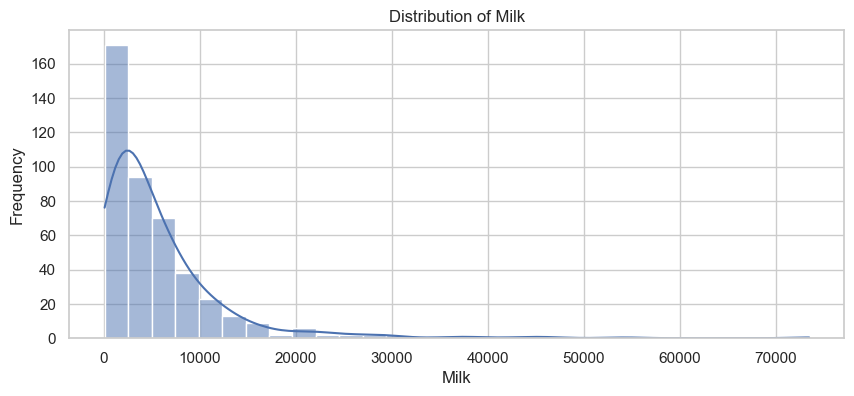

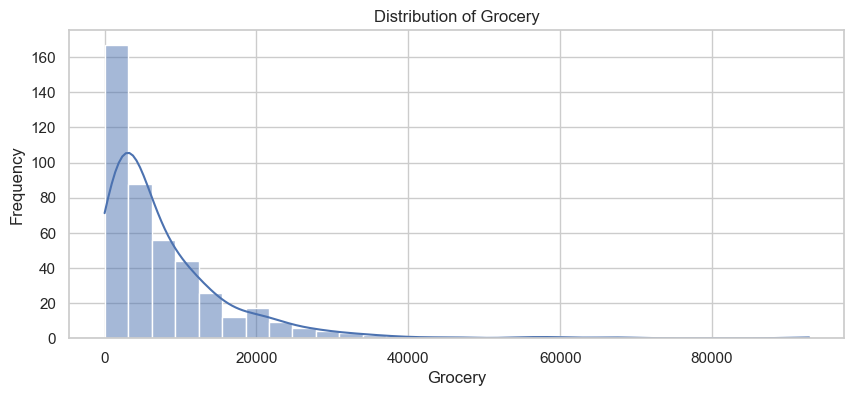

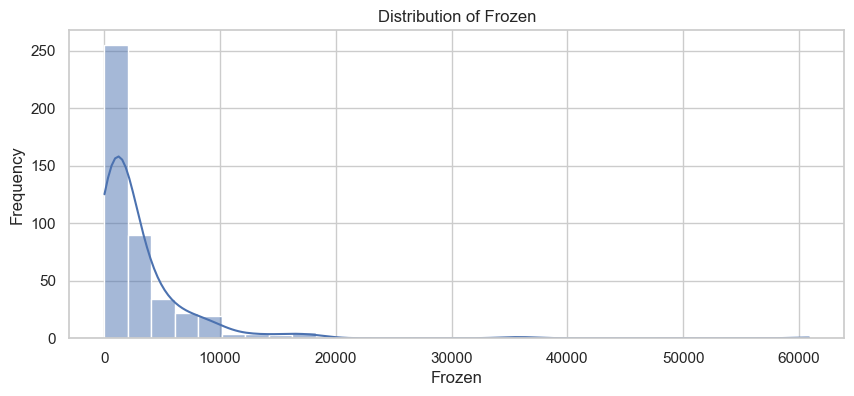

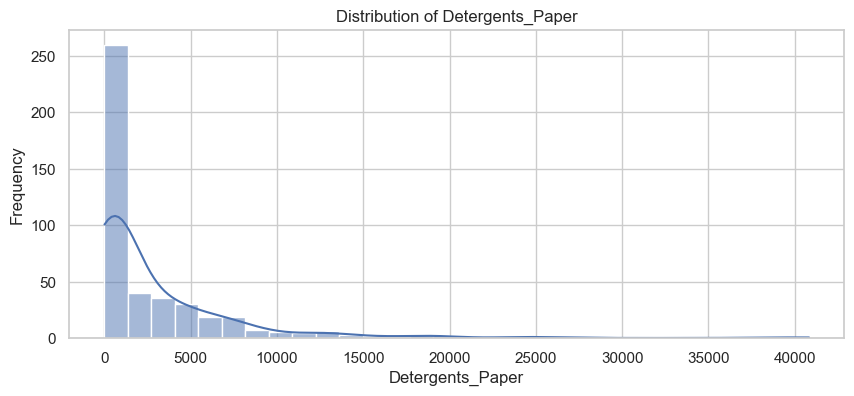

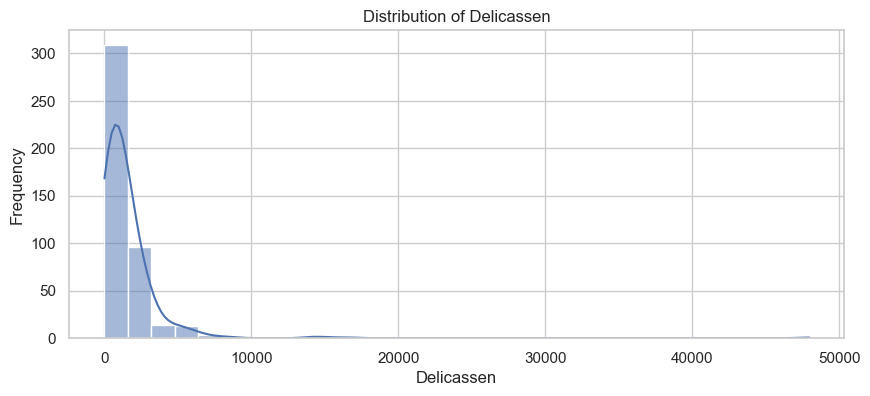

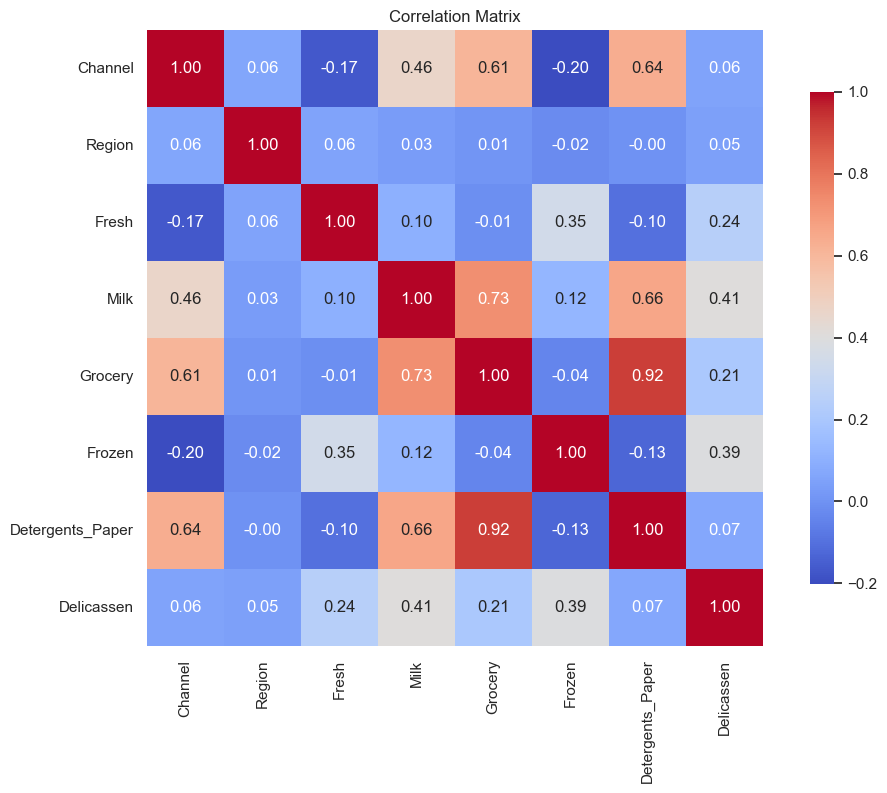

In [5]:
# Check if the dataset displays pareto principle
df.describe()
# Plotting the distribution of each feature
sns.set(style="whitegrid")
for column in df.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
# Display the correlation matrix
plt.title('Correlation Matrix')
plt.show()

**Your observations here**

- ex.: Frozen, Grocery, Milk and Detergents Paper have a high...
- ...



# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [7]:
# data cleaning
# Check for missing values
df.isnull().sum()
# Check for duplicates
df.duplicated().sum()
# Remove duplicates if any
df.drop_duplicates(inplace=True)
# Check the data types of each column
df.dtypes
# Convert categorical columns to appropriate data types if necessary
# In this case, all columns are numerical, so no conversion is needed
# Display the cleaned dataset
df.head()

# Data transformation
# Normalize the data using Min-Max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
# Display the scaled dataset
df_scaled.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


**Your comment here**

-  ...
-  ...

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [8]:
# Your import here:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

customers_scale = scaler.fit_transform(df)

customers_scale = pd.DataFrame(customers_scale, columns=df.columns)

customers_scale.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [9]:
from sklearn.cluster import KMeans

# Data Clustering with KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
# Fit the model to the scaled data
kmeans.fit(customers_scale)
# Predict the cluster labels
labels = kmeans.predict(customers_scale)
# Add the cluster labels to the original dataframe
df['Cluster'] = labels
# Display the first few rows of the dataframe with cluster labels
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0


### Looking to the elbow we can choose 2 like the correct number of clusters

In [13]:
kmeans_2 = KMeans(n_clusters=2).fit(customers_scale)

labels = kmeans_2.predict(customers_scale)

clusters = kmeans_2.labels_.tolist()

In [14]:
df['Label'] = labels

Count the values in `labels`.

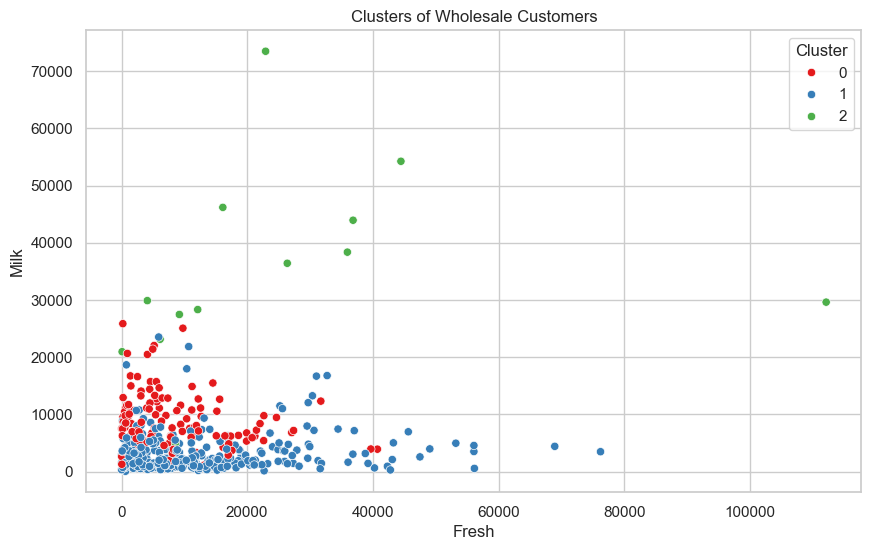

In [11]:
# count the values in cluster column
df['Cluster'].value_counts()
# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fresh', y='Milk', hue='Cluster', data=df, palette='Set1')
plt.title('Clusters of Wholesale Customers')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.legend(title='Cluster')
plt.show()

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [15]:
from sklearn.cluster import DBSCAN 

# Data Clustering with DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
# Fit the model to the scaled data
dbscan.fit(customers_scale)
# Predict the cluster labels
labels_dbscan = dbscan.labels_
# Add the cluster labels to the original dataframe
df['DBSCAN_Cluster'] = labels_dbscan
# Display the first few rows of the dataframe with DBSCAN cluster labels
df.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster,Label,DBSCAN_Cluster
0,2,3,12669,9656,7561,214,2674,1338,0,0,-1
1,2,3,7057,9810,9568,1762,3293,1776,0,0,-1
2,2,3,6353,8808,7684,2405,3516,7844,0,0,-1
3,1,3,13265,1196,4221,6404,507,1788,1,1,1
4,2,3,22615,5410,7198,3915,1777,5185,0,0,-1


Count the values in `labels_DBSCAN`.

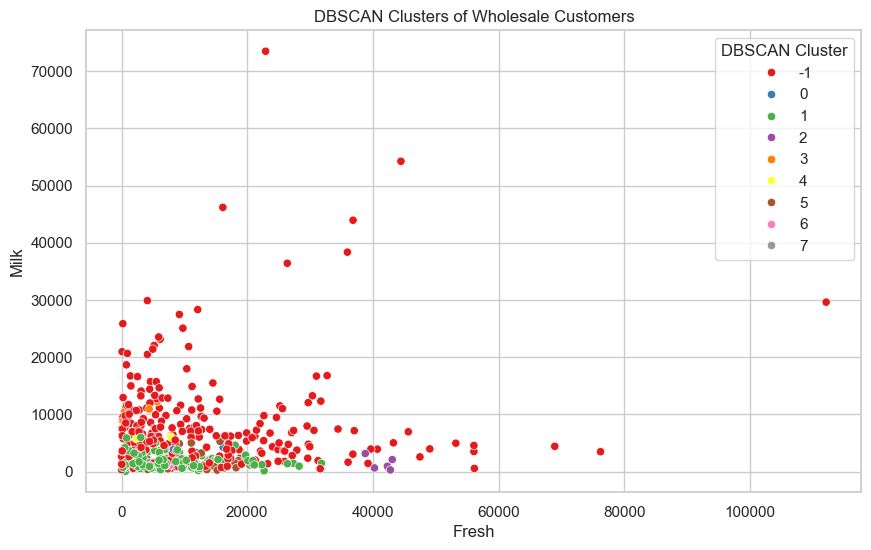

In [17]:
# Count the values in label_DBSCAN column
df['DBSCAN_Cluster'].value_counts()
# Visualizing the DBSCAN clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fresh', y='Milk', hue='DBSCAN_Cluster', data=df, palette='Set1')
plt.title('DBSCAN Clusters of Wholesale Customers')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.legend(title='DBSCAN Cluster')
plt.show()


# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [18]:
def plot(x,y,hue):
    sns.scatterplot(x=x, 
                    y=y,
                    hue=hue)
    plt.title('Detergents Paper vs Milk ')
    return plt.show();

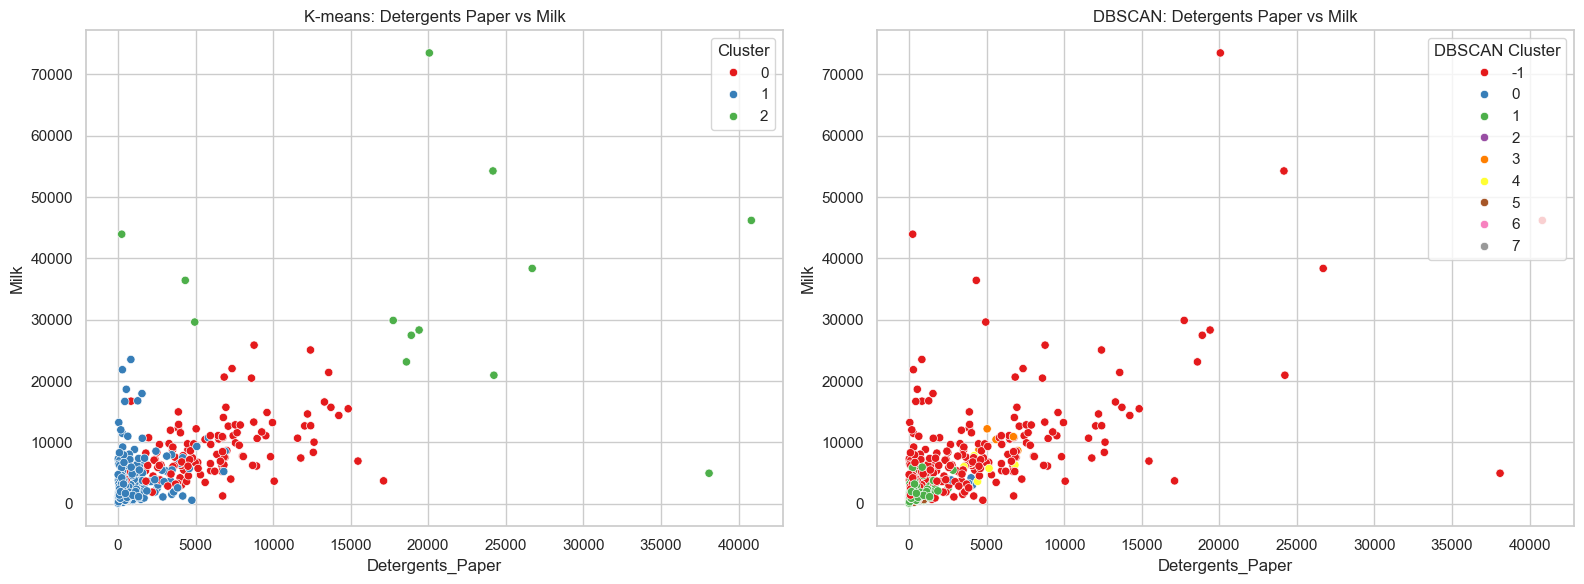

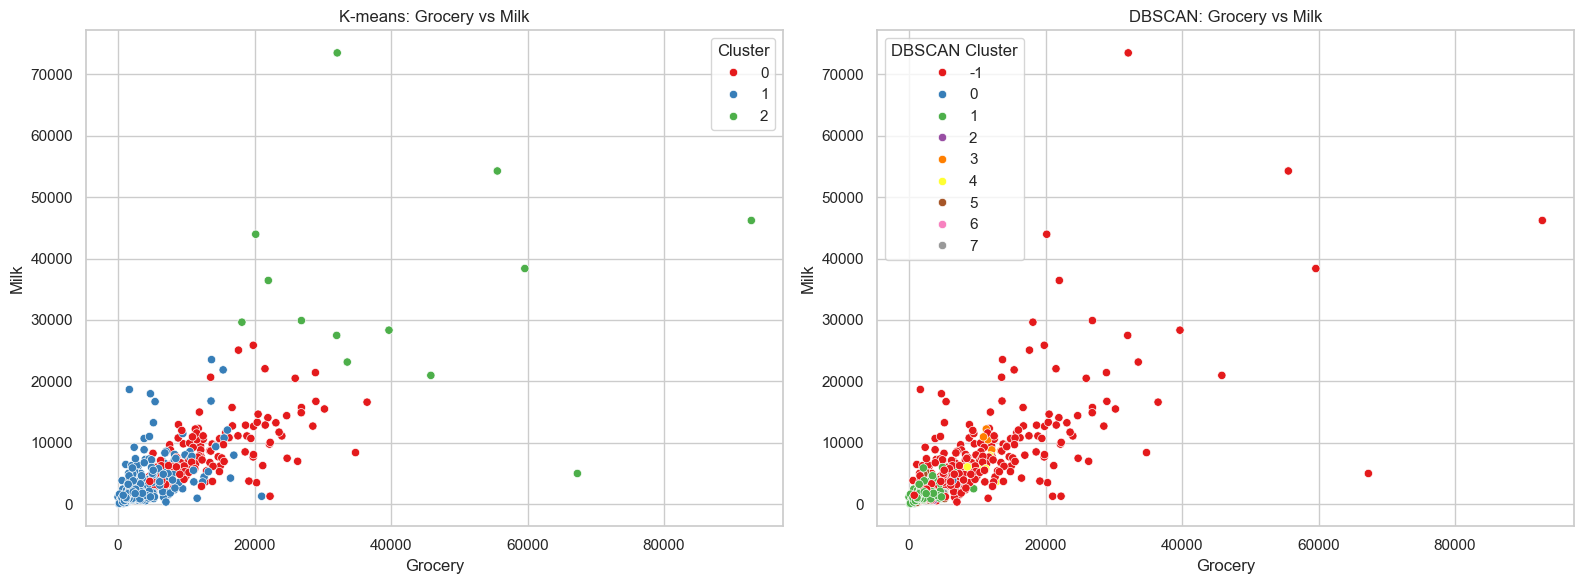

In [20]:
# Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# K-means clusters
sns.scatterplot(x='Detergents_Paper', y='Milk', hue='Cluster', data=df, palette='Set1', ax=ax1)
ax1.set_title('K-means: Detergents Paper vs Milk')
ax1.set_xlabel('Detergents_Paper')
ax1.set_ylabel('Milk')
ax1.legend(title='Cluster')

# DBSCAN clusters
sns.scatterplot(x='Detergents_Paper', y='Milk', hue='DBSCAN_Cluster', data=df, palette='Set1', ax=ax2)
ax2.set_title('DBSCAN: Detergents Paper vs Milk')
ax2.set_xlabel('Detergents_Paper')
ax2.set_ylabel('Milk')
ax2.legend(title='DBSCAN Cluster')

plt.tight_layout()
plt.show()

# Visualize `Grocery` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# K-means clusters
sns.scatterplot(x='Grocery', y='Milk', hue='Cluster', data=df, palette='Set1', ax=ax1)
ax1.set_title('K-means: Grocery vs Milk')
ax1.set_xlabel('Grocery')
ax1.set_ylabel('Milk')
ax1.legend(title='Cluster')

# DBSCAN clusters
sns.scatterplot(x='Grocery', y='Milk', hue='DBSCAN_Cluster', data=df, palette='Set1', ax=ax2)
ax2.set_title('DBSCAN: Grocery vs Milk')
ax2.set_xlabel('Grocery')
ax2.set_ylabel('Milk')
ax2.legend(title='DBSCAN Cluster')

plt.tight_layout()
plt.show()

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

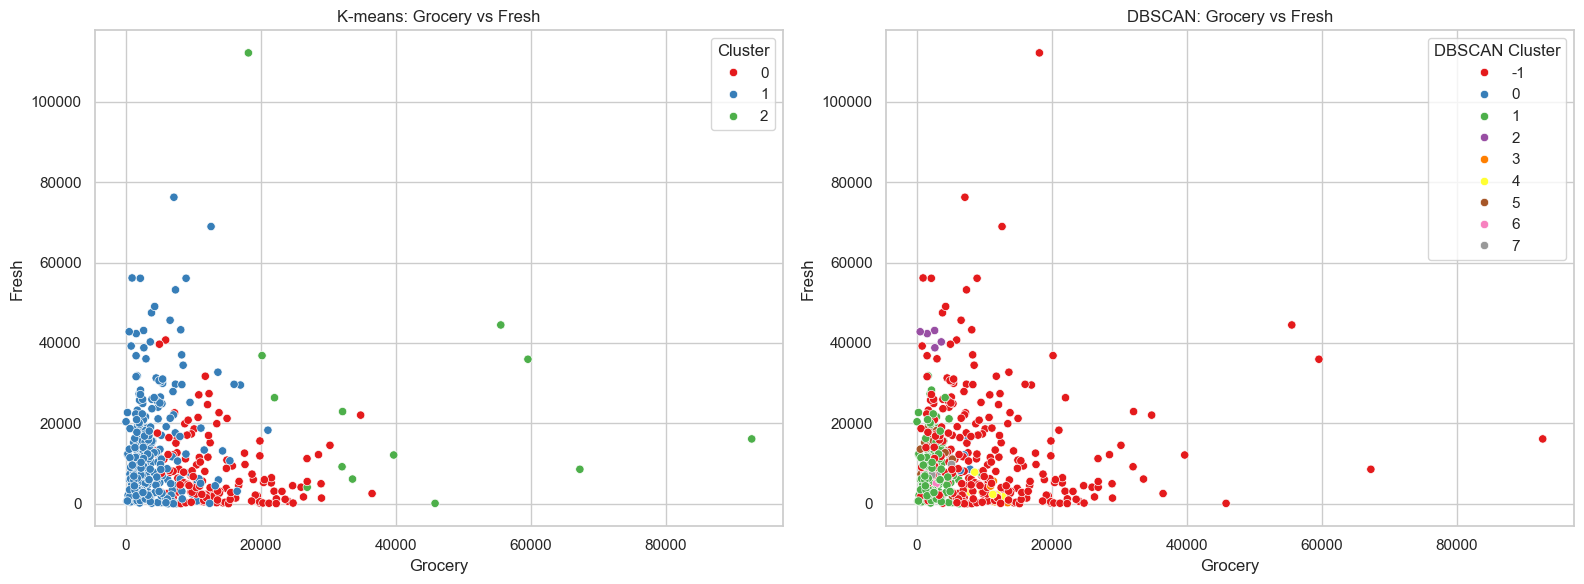

In [21]:
# Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
# K-means clusters
sns.scatterplot(x='Grocery', y='Fresh', hue='Cluster', data=df, palette='Set1', ax=ax1)
ax1.set_title('K-means: Grocery vs Fresh')
ax1.set_xlabel('Grocery')
ax1.set_ylabel('Fresh')
# DBSCAN clusters
sns.scatterplot(x='Grocery', y='Fresh', hue='DBSCAN_Cluster', data=df, palette='Set1', ax=ax2)
ax2.set_title('DBSCAN: Grocery vs Fresh')
ax2.set_xlabel('Grocery')
ax2.set_ylabel('Fresh')
ax2.legend(title='DBSCAN Cluster')
plt.tight_layout()
plt.show()

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

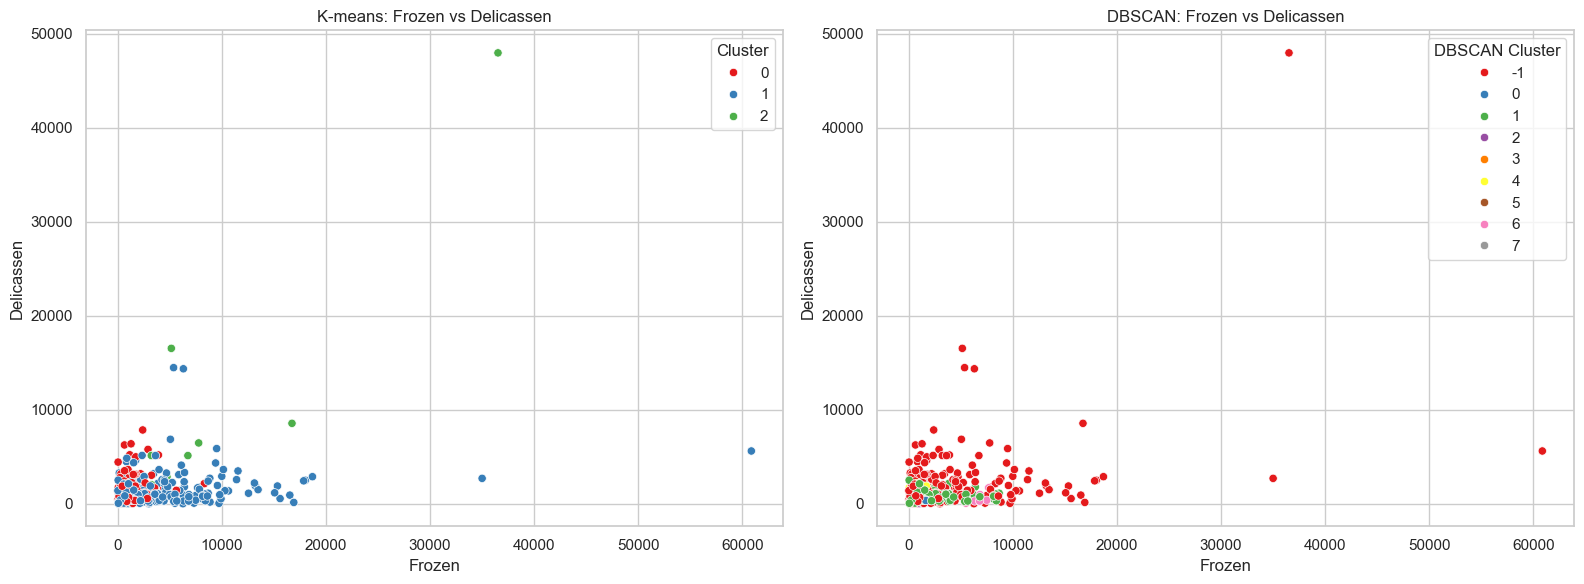

In [22]:
# Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
# K-means clusters
sns.scatterplot(x='Frozen', y='Delicassen', hue='Cluster', data=df, palette='Set1', ax=ax1)
ax1.set_title('K-means: Frozen vs Delicassen')
ax1.set_xlabel('Frozen')
ax1.set_ylabel('Delicassen')
# DBSCAN clusters
sns.scatterplot(x='Frozen', y='Delicassen', hue='DBSCAN_Cluster', data=df, palette='Set1', ax=ax2)
ax2.set_title('DBSCAN: Frozen vs Delicassen')
ax2.set_xlabel('Frozen')
ax2.set_ylabel('Delicassen')
ax2.legend(title='DBSCAN Cluster')
plt.tight_layout()
plt.show()

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [23]:
# use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.
df.groupby('Cluster').mean(), df.groupby('DBSCAN_Cluster').mean()

(          Channel    Region         Fresh          Milk       Grocery  \
 Cluster                                                                 
 0        2.000000  2.623077   8165.915385   8748.515385  13905.492308   
 1        1.003367  2.505051  13075.898990   3218.737374   3855.696970   
 2        1.846154  2.615385  25770.769231  35160.384615  41977.384615   
 
               Frozen  Detergents_Paper   Delicassen     Label  DBSCAN_Cluster  
 Cluster                                                                        
 0        1441.630769       5991.146154  1535.007692  0.030769       -0.538462  
 1        3620.400673        776.875421  1242.249158  1.000000        0.646465  
 2        6844.538462      19867.384615  7880.307692  0.076923       -1.000000  ,
                  Channel   Region         Fresh          Milk       Grocery  \
 DBSCAN_Cluster                                                                
 -1              1.490196  2.45098  13729.564706   8359.886275

Which algorithm appears to perform better?

**Your observations here**

- 

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [41]:
# Your code here:

**Your comment here**

- 

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

**Your comment here**

- 